Importing necessary libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading Data from Kaggle

In [5]:
habm = pd.read_csv("/Projects/DataScience-TheNewOil/DataVisualisation/HaberMan/Data/haberman.csv")
habm.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


Statistics of Dataset

In [6]:
print("Shape of Dataset is " + str(habm.shape))
print(habm.size)
print(habm. columns)


Shape of Dataset is (306, 4)
1224
Index(['age', 'year', 'nodes', 'status'], dtype='object')


Investigating All the coloumns

In [7]:
#habm["age"].value_counts()
#habm["nodes"].value_counts()


df = habm["status"].value_counts()
print(df)
if df[1] == df[2] : 
    print("\nDataset is Balanced")
else :
    print("\nDataset is Im-balanced")
    
print("\nNo. of people who survive more than 5 years : " + str(df[1]))
print("\nNo. of people who survive more than 5 years : " + str(df[2]))

1    225
2     81
Name: status, dtype: int64

Dataset is Im-balanced

No. of people who survive more than 5 years : 225

No. of people who survive more than 5 years : 81


2-D Scatter Plot

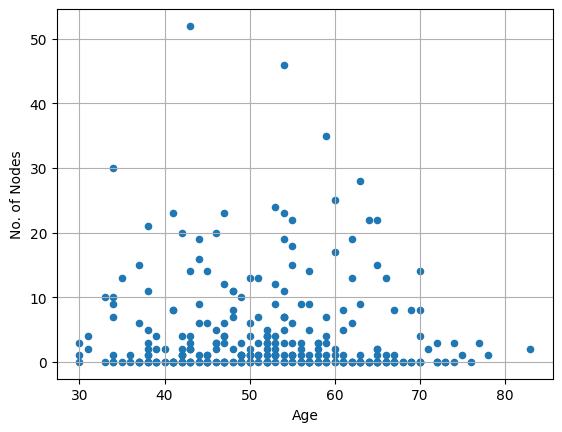

In [8]:
habm.plot(kind='scatter', x="age", y ="nodes", xlabel='Age', ylabel='No. of Nodes')
plt.grid()
plt.show()

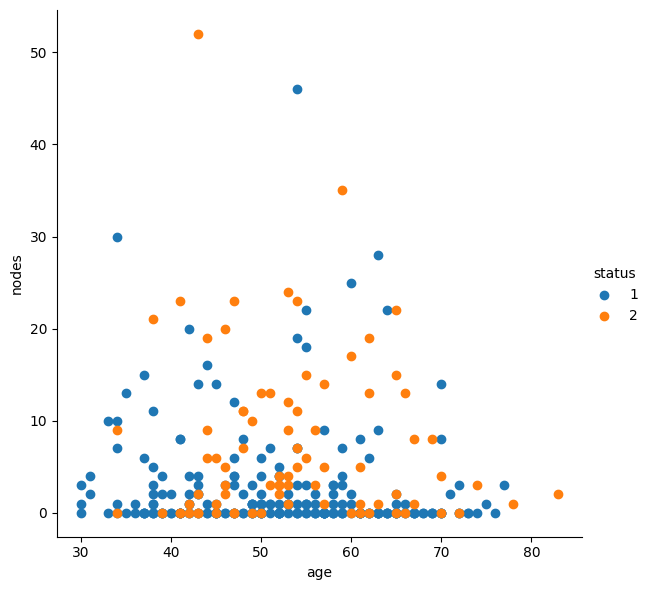

In [9]:
sns.FacetGrid(habm, hue="status", height=6).map(plt.scatter, "age", "nodes").add_legend()

Pair Plot using Seaborn

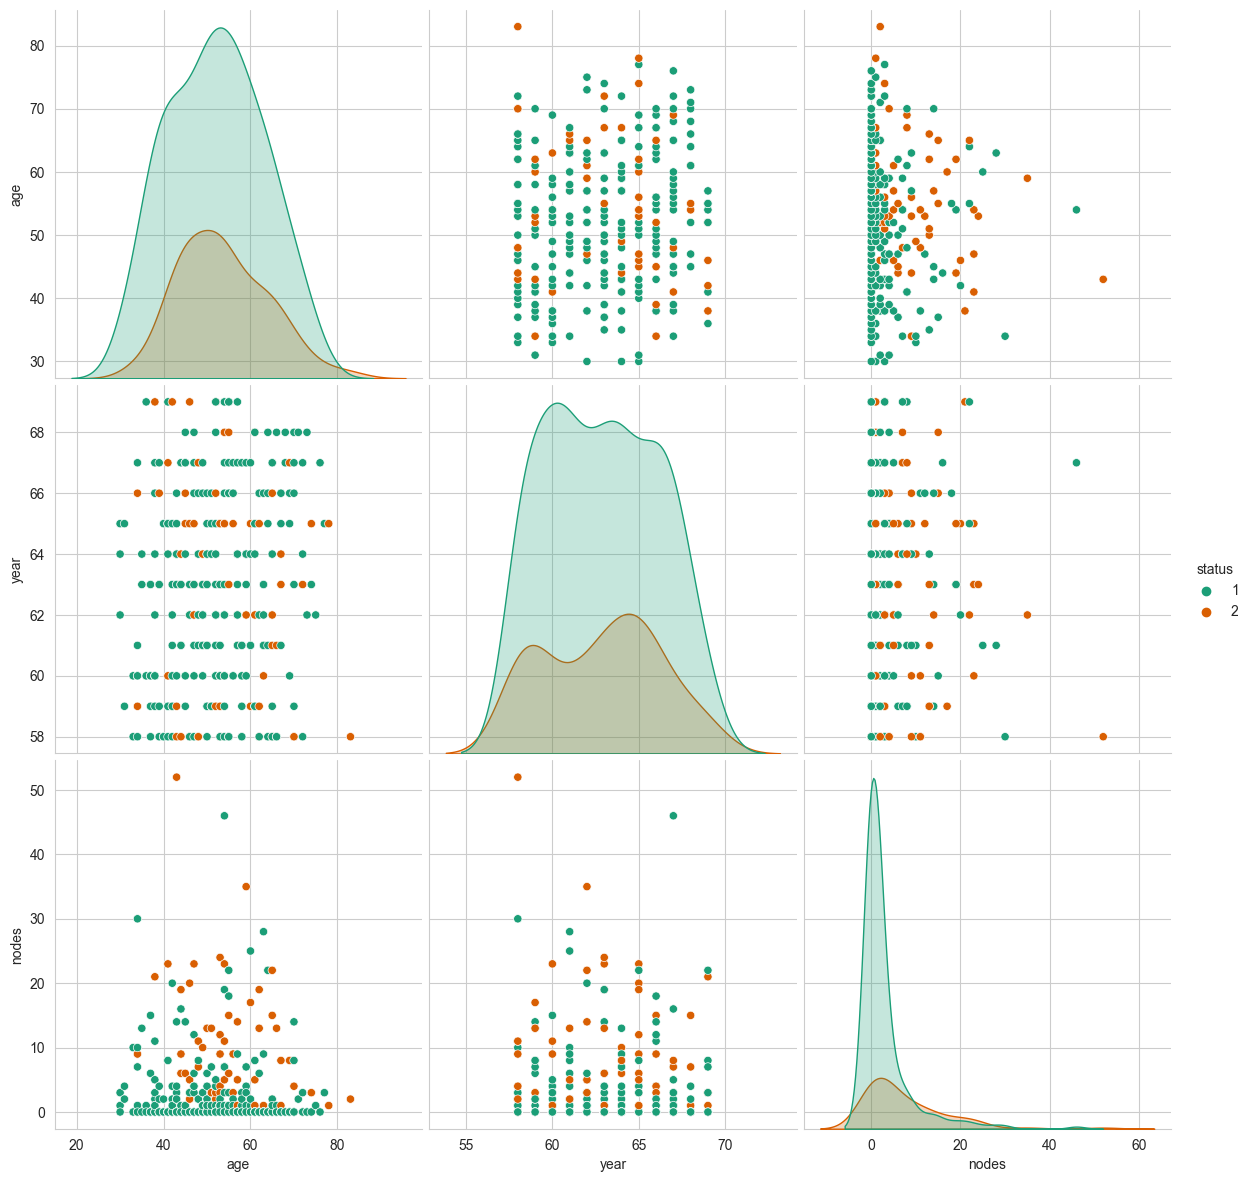

In [10]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(habm, hue  = 'status',height= 4,palette='Dark2')
plt.show()

Univariate analysis

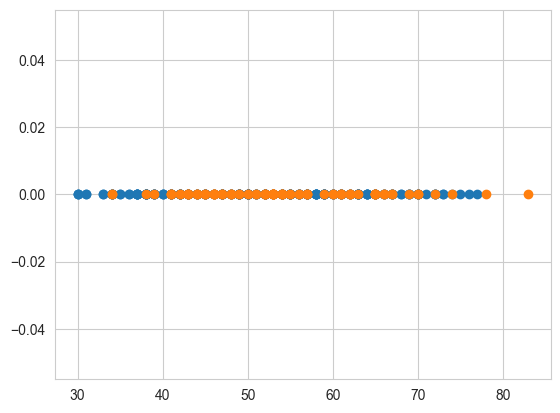

In [11]:
survive = habm[habm["status"]==1]
not_survive = habm[habm["status"] ==2]

plt.plot(survive["age"], np.zeros_like(survive["age"]), 'o')
plt.plot(not_survive["age"], np.zeros_like(not_survive["age"]), 'o')


<AxesSubplot:xlabel='age', ylabel='Count'>

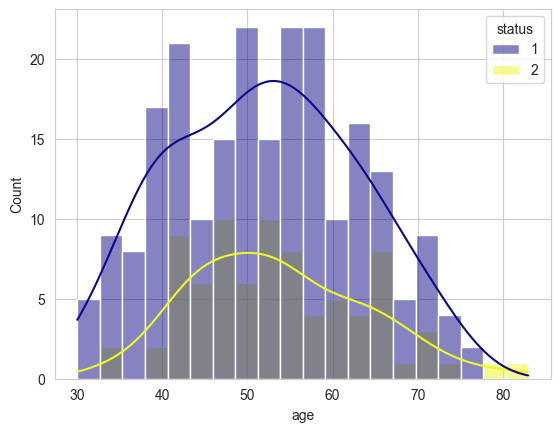

In [12]:
sns.histplot(data = habm, x ='age' ,hue='status', kde=True, palette='plasma',bins=20)


<AxesSubplot:xlabel='year', ylabel='Count'>

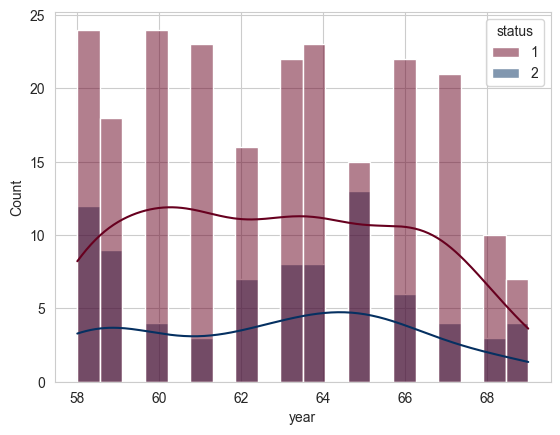

In [13]:

sns.histplot(data = habm, x ='year' ,hue='status', kde=True, palette='RdBu',bins=20)

<AxesSubplot:xlabel='nodes', ylabel='Count'>

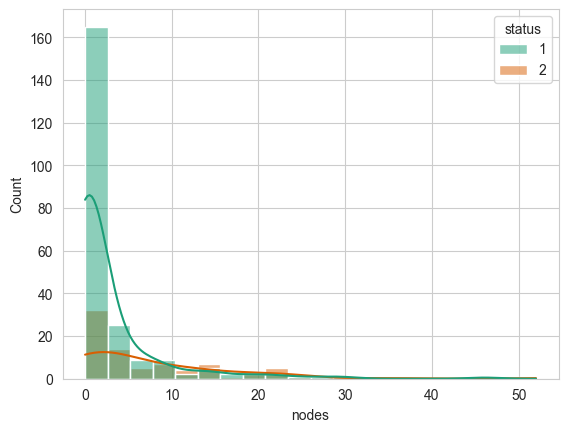

In [14]:

sns.histplot(data = habm, x ='nodes' ,hue='status', kde=True, palette='Dark2',bins=20)

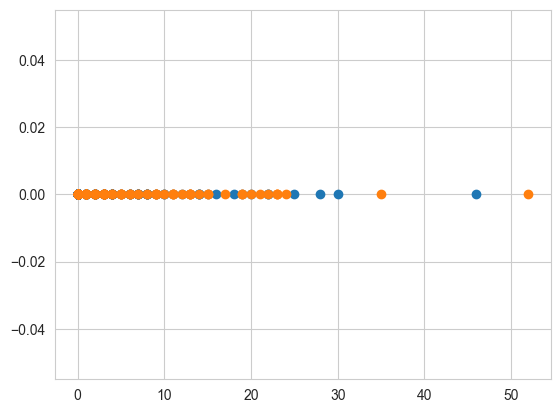

In [15]:
plt.plot(survive["nodes"], np.zeros_like(survive["nodes"]), 'o')
plt.plot(not_survive["nodes"], np.zeros_like(not_survive["nodes"]), 'o')


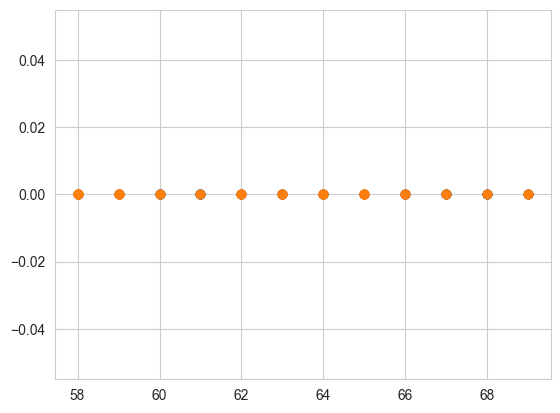

In [16]:
plt.plot(survive["year"], np.zeros_like(survive["year"]), 'o')
plt.plot(not_survive["year"], np.zeros_like(not_survive["year"]), 'o')


Printing PDF CDF 

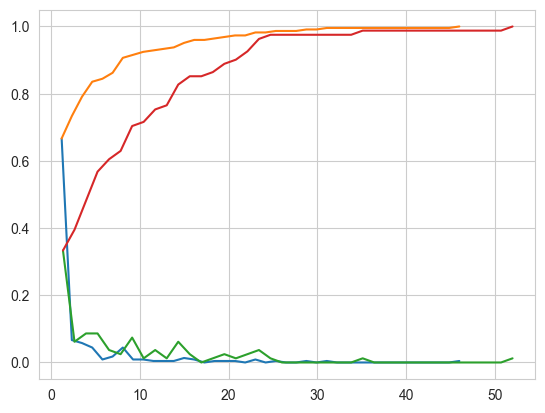

In [17]:
counts, bin_m = np.histogram(survive["nodes"], bins = 40, density=True)
#print(counts)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_m)
cdf = np.cumsum(pdf)
#print(cdf)
plt.plot(bin_m[1:], pdf)
plt.plot(bin_m[1:], cdf)

counts, bin_m = np.histogram(not_survive["nodes"], bins = 40, density=True)
#print(counts)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_m)
cdf = np.cumsum(pdf)
#print(cdf)
plt.plot(bin_m[1:], pdf)
plt.plot(bin_m[1:], cdf)

In [18]:
print("Mean Stats")

print("Mean of Age - S : " + str(np.mean(survive["age"])))
print("Mean of Age - NS: " + str(np.mean(not_survive["age"])))
print("\nMean of Year - S: " + str(np.mean(survive["year"])))
print("Mean of Year - NS : " + str(np.mean(not_survive["year"])))

print("\nMean of No. of nodes - S : " + str(np.mean(survive["nodes"])))
print("Mean of No. of nodes - NS: " + str(np.mean(not_survive["nodes"])))





Mean Stats
Mean of Age - S : 52.01777777777778
Mean of Age - NS: 53.67901234567901

Mean of Year - S: 62.86222222222222
Mean of Year - NS : 62.82716049382716

Mean of No. of nodes - S : 2.7911111111111113
Mean of No. of nodes - NS: 7.45679012345679


In [19]:
print("Standard Deviation Stats")

print("SD of Age - S : " + str(np.std(survive["age"])))
print("SD of Age - NS : " + str(np.std(not_survive["age"])))

print("\nSD of Year - S : " + str(np.std(survive["year"])))
print("SD of Year : - NS " + str(np.std(not_survive["year"])))

print("\nSD of No. of nodes - S : " + str(np.std(survive["nodes"])))
print("SD of No. of nodes - NS : " + str(np.std(not_survive["nodes"])))

Standard Deviation Stats
SD of Age - S : 10.987655475100508
SD of Age - NS : 10.104182193031312

SD of Year - S : 3.2157452144021947
SD of Year : - NS 3.3214236255207887

SD of No. of nodes - S : 5.857258449412138
SD of No. of nodes - NS : 9.128776076761635


In [20]:
print("Standard Deviation Stats")

print("95th Quantile of Age - S : " + str(np.quantile(survive["age"], .95)))
print("95th Quantile of Age - NS : " + str(np.quantile(not_survive["age"], .95)))

print("\n95th Quantile of Year - S : " + str(np.quantile(survive["year"], .95)))
print("95th Quantile of Year : - NS " + str(np.quantile(not_survive["year"], .95)))

print("\n95th Quantile of No. of nodes - S : " + str(np.quantile(survive["nodes"], .95)))
print("95th Quantile of No. of nodes - NS : " + str(np.quantile(not_survive["nodes"], .95)))

Standard Deviation Stats
95th Quantile of Age - S : 70.0
95th Quantile of Age - NS : 70.0

95th Quantile of Year - S : 68.0
95th Quantile of Year : - NS 68.0

95th Quantile of No. of nodes - S : 14.0
95th Quantile of No. of nodes - NS : 23.0


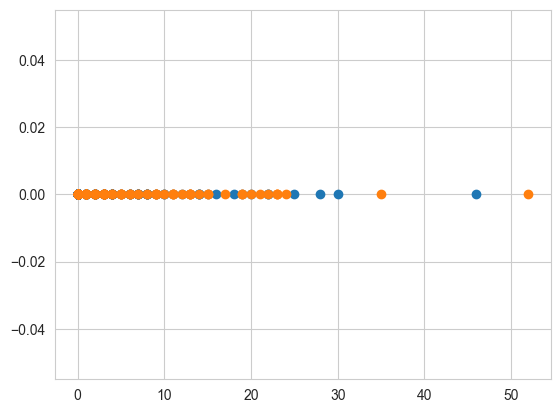

In [21]:
#From this we find that no of nodes is nice feature in order to achieve any amount of classification.

plt.plot(survive['nodes'], np.zeros_like(survive["nodes"]), 'o')
plt.plot(not_survive['nodes'], np.zeros_like(not_survive["nodes"]), 'o')


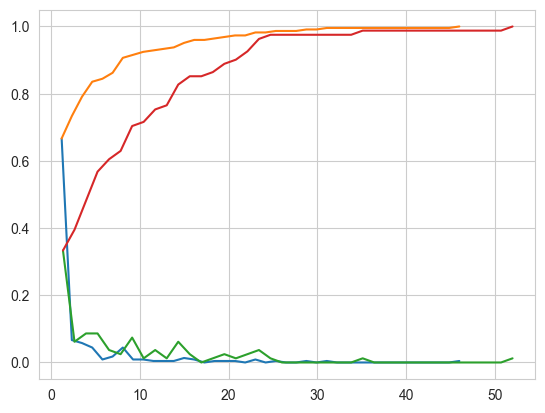

In [22]:
counts, bin_m = np.histogram(survive["nodes"], bins = 40, density=True)
#print(counts)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_m)
cdf = np.cumsum(pdf)
#print(cdf)
plt.plot(bin_m[1:], pdf)
plt.plot(bin_m[1:], cdf)

counts, bin_m = np.histogram(not_survive["nodes"], bins = 40, density=True)
#print(counts)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_m)
cdf = np.cumsum(pdf)
#print(cdf)
plt.plot(bin_m[1:], pdf)
plt.plot(bin_m[1:], cdf)

Multivariate analysis

<AxesSubplot:xlabel='status', ylabel='nodes'>

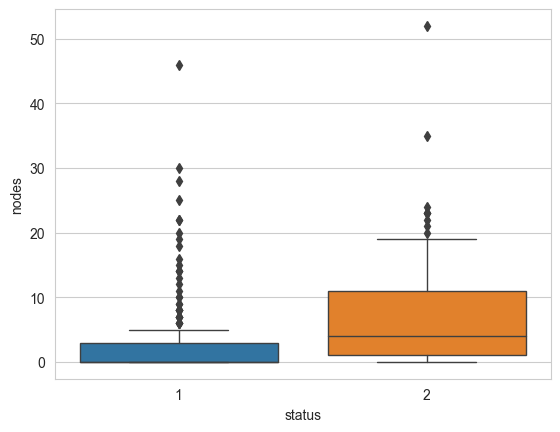

In [23]:
sns.boxplot(data = habm, x = 'status', y = 'nodes',linewidth=1,whis=0.8)

<AxesSubplot:xlabel='status', ylabel='nodes'>

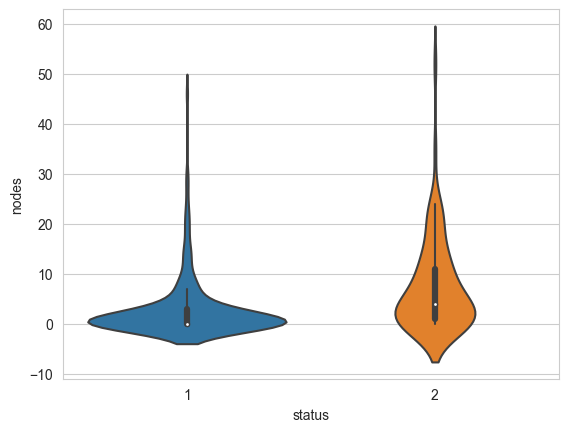

In [24]:
sns.violinplot(data = habm, x = 'status', y = 'nodes')

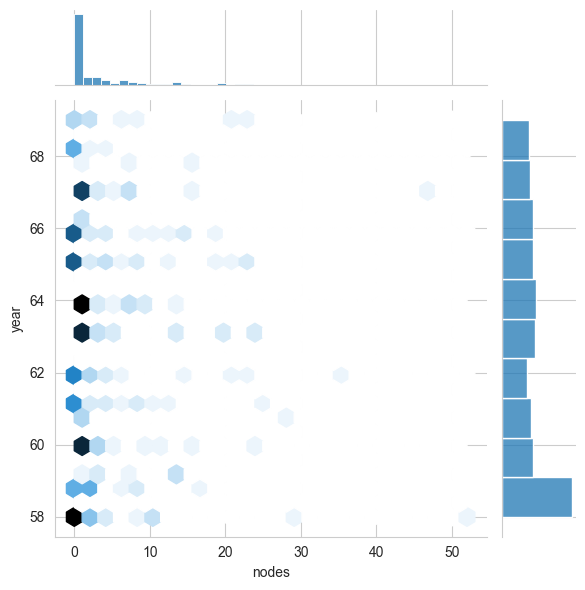

In [25]:
sns.jointplot(data=habm, x = 'nodes', y = 'year',kind='hex')
plt.show()

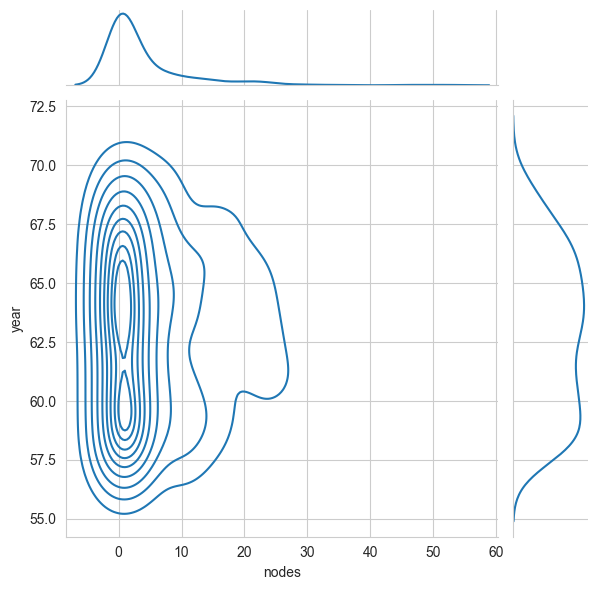

In [26]:
sns.jointplot(data=habm, x = 'nodes', y = 'year',kind='kde')
plt.show()

In [27]:
#Observations